# 1s project on simple linear regression  and this base_line_model
 # projest is based on total advertivesment and sales relationship 
# # understanding the business problam 


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#  2 data understanhing 

In [19]:
#load the data set 
df=pd.read_csv("Downloads/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [21]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [22]:
df["total_spend"]= df["TV"] + df["radio"] + df["newspaper"]
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [23]:
df.drop(columns=["TV","radio","newspaper"],inplace=True)


In [24]:
df.head()

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


# data preprocessing  

In [25]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


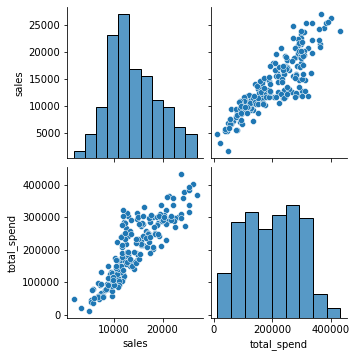

In [26]:
sns.pairplot(df)
plt.show()

In [29]:
df.cov()

,sales,total_spend
sales,2.722185e+07,4.209673e+08
total_spend,4.209673e+08,8.646244e+09


In [30]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


In [31]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

# train_test_split


In [65]:
#create x and y varible 
#taking only one varible now 
x=df.drop(columns=["sales"])
y=df["sales"]

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# modeling 

In [67]:
from sklearn.linear_model import LinearRegression 

#save the model 
model=LinearRegression()
#model fit
model.fit(x_train,y_train)

LinearRegression()

In [68]:
#print the intercept(b0)
model.intercept_

4169.512013489044

In [69]:
#print the coeficient (b1)
model.coef_

array([0.0489571])

# predicton 

In [70]:
train_prediction=model.predict(x_train)
test_prediction=model.predict(x_test)

# Eavuation

In [71]:
from sklearn.metrics import mean_absolute_error
print("MAE for train data",mean_absolute_error(y_train,train_prediction))
print("MAe for test data ",mean_absolute_error(y_test,test_prediction))

MAE for train data 1917.5145382145042
MAe for test data  2088.4273558466143


In [72]:
from sklearn.metrics import mean_squared_error
print("MSE for the train  data",mean_squared_error(y_train,train_prediction))
print("MSE for the test data ",mean_squared_error(y_test,test_prediction))

MSE for the train  data 6421575.106597045
MSE for the test data  7779806.406885764


In [75]:
#use of the  RMSE
print("RMSE for train data =",np.sqrt(mean_squared_error(y_train,train_prediction)))
print("Rmse for test data =",np.sqrt(mean_squared_error(y_test,test_prediction)))

RMSE for train data = 2534.0826952956854
Rmse for test data = 2789.230432733331


In [78]:
from sklearn.metrics import r2_score
print( "train data r2=",r2_score(y_train,train_prediction))
print("test data r2=",r2_score(y_test,test_prediction))

train data r2= 0.7524092686260718
test data r2= 0.7535196255373878


In [79]:
#train the r2score
model.score(x_train,y_train)


0.7535196255373878

In [80]:
#test the r2 scores
model.score(x_test,y_test)

0.7535196255373878

# Cross-validation 

In [88]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=5)
print(scores)
cv_scores=scores.mean()
print(cv_scores)

[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
0.7433783178555419


# check the assumation 
#check the linearlityerror

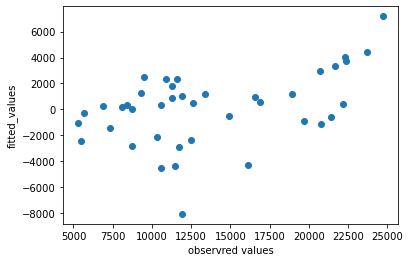

In [91]:
test_res=y_test - test_prediction
plt.scatter(y_test,test_res)
plt.xlabel("observred values")
plt.ylabel("fitted_values")
plt.show()

# normality error

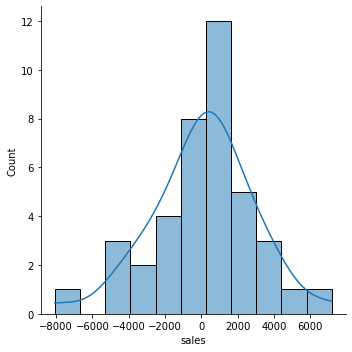

In [94]:
sns.displot(test_res,kde=True)
#plt.hist(test-res)
plt.show()

# eqeal varinace (homoscadesncity) 

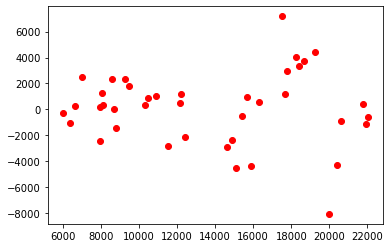

In [97]:
plt.scatter(test_prediction,test_res,c="r")

# variables singificances

In [101]:
import statsmodels.formula.api as smf
model12=smf.ols("y~x",data=df).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           5.06e-62
Time:                        16:44:22   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
x              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# final infreances

In [104]:
#use the model make prediction on new values 
model.predict([[200000]])

C:\Users\Rohit Jain\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13960.93124868])

In [106]:
# save the model 
from joblib import dump
dump(model,"sales_models.joblib")

['sales_models.joblib']

In [111]:
#load the models 
from joblib import load 
loaded_model=load("sales_models.joblib")

loaded_model.predict([[200000]])

C:\Users\Rohit Jain\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13960.93124868])